## Unit tests for datasets.py
This notebook is a set of 'unit tests' that datasets.py should pass!

In [1]:
%matplotlib inline
import datasets

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [11]:
from astropy.io import fits
test = fits.getdata(data_fname)

In [14]:
import numpy as np
np.save('/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/dark_matter/testdm.npy',test)

In [32]:
#data_fname = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10.fit'
data_fname = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/dark_matter/dm_cat_2600Mpc_data.fits'
mask_fname = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10_vlim_zmask.fit'
dset = datasets.DMDataset(data_fname,mask_fname)

In [33]:
dset.make(1024,.75,.9,0,90,-60,-40)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
nbar is 5.57864536047 galaxies per pixel


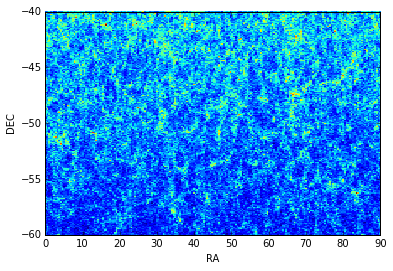

In [34]:
dset.make_sky_map()

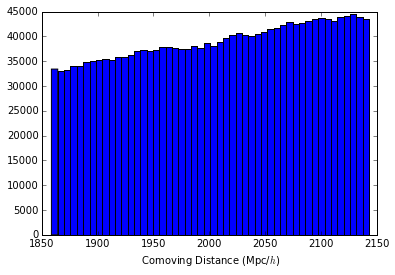

In [35]:
dset.plot_n_z()

In [36]:
dset.write()

## Old tests

In [2]:
dset = datasets.BaseDataset('/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10.fit',
                     '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10_vlim_zmask.fit')

In [3]:
type(dset) is datasets.BaseDataset

True

In [4]:
dset.load_data()

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:315: UserWarning: No ORDERING keyword in header file : assume RING
  "assume %s"%ordering)
/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:343: UserWarning: No INDXSCHM keyword in header file : assume EXPLICIT
  "assume {}".format(schm))


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


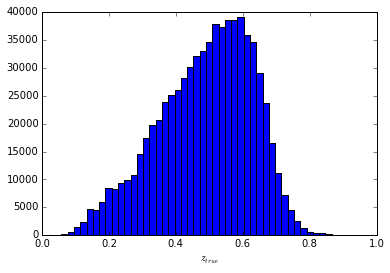

In [32]:
dset.plot_n_z()

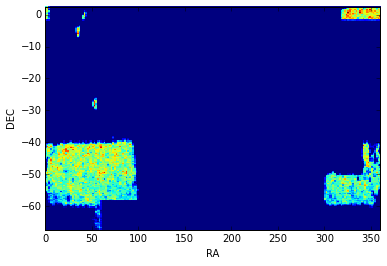

In [33]:
dset.make_sky_map()

In [5]:
dset.apply_footprint(0,360,-60,-40)

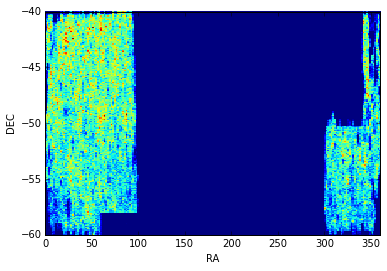

In [6]:
dset.make_sky_map()

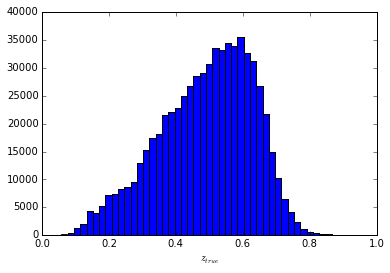

In [7]:
dset.plot_n_z()

In [56]:
dset.apply_z_cut(.45,.6)

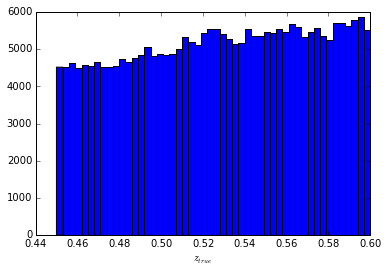

In [59]:
dset.plot_n_z()

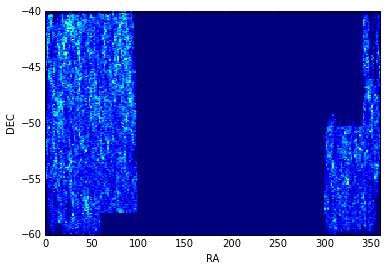

In [49]:
dset.make_sky_map()

In [8]:
dset.pixelize_at_target_nside(1024)

nbar is 1.56719380045 galaxies per pixel


In [9]:
dset.compute_new_jk_regions()

In [10]:
dset.jk_labels

array([ 3,  3,  3, ..., 15, 21, 21], dtype=int32)

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


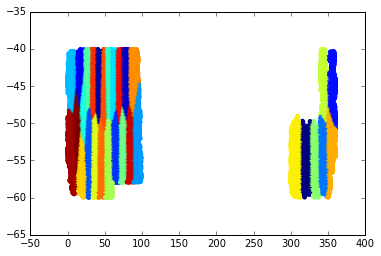

In [11]:
import matplotlib.pyplot as plt
plt.scatter(dset.pixelized[0],dset.pixelized[1],c=dset.jk_labels,linewidth=0)

In [17]:
dset.__dict__.keys()

['jk_labels',
 'nside',
 'min_z',
 'pixelized',
 'max_z',
 'mask',
 'datapath',
 'zmask',
 'n_jackknife',
 'zvar',
 'data',
 'maskpath',
 'nbar']

In [12]:
dset.write()

In [65]:
new = datasets.BaseDataset.fromfilename(datasets.output_path+'ZSPEC0.45_0.6nside1024nJack30')

In [70]:
import numpy as np
np.sum(new.pixelized[2])/len(new.pixelized[2])

0.61128921361531519

In [22]:
new.load_data()

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [23]:
new.data

FITS_rec([ (  40850688,   0.76848191,   2.44496918, 0,  16.61416817,  0.01123602, [ 18.23629951,  17.27402878,  16.87423515,  16.61416817], [ 0.01261908,  0.00751523,  0.00680834,  0.01123602], [-19.54416656, -20.4748745 , -20.86447906, -21.12171364], [ 0.01261908,  0.00751523,  0.00680834,  0.01123602],  0.64424682,  0.11347058,  0.01396738,  0.3213093 ,  0.103375  ),
          (  40920936,   0.68540502,   2.3888855 , 0,  17.01074219,  0.01074731, [ 18.65528488,  17.67123795,  17.26914597,  17.01074219], [ 0.01868105,  0.00890693,  0.00751209,  0.01074731], [-19.32553291, -20.25806236, -20.64457321, -20.89505005], [ 0.01868105,  0.00890693,  0.00751209,  0.01074731],  0.51954448,  0.12197644,  0.01391132,  0.07820927,  0.105697  ),
          (  41288747,   0.46284676,   2.00819397, 0,  16.06750107,  0.00619566, [ 17.67001343,  16.72480392,  16.31190491,  16.06750107], [ 0.01077245,  0.00603134,  0.00531895,  0.00619566], [-19.80960846, -20.75139999, -21.16274071, -21.4074192 ], [ 0.01

In [19]:
from astropy.cosmology import Planck13 as cosmo

In [41]:
cosmo.comoving_distance(.35)*cosmo.h

<Quantity 960.7756354760884 Mpc>